# Aşırı Uydurma ve Erken Durdurma
Overfitting and Early Stopping


---


### Basit Bir Öğrenme Modelinde Aşırı Uydurma (Overfitting) Probleminin Çözümü: Erken Durdurma (Early Stopping)

---

Bunun için MNIST veri seti için basit bir Evrişimli sinir ağı (CNN) oluşturulmuştur. 

* Aktivasyon fonksiyonu olarak **ReLU** ve çıkış katmanında **Sigmoid** kullanılmıştır. Aktivasypn fonksiyonlarıyla ilgili daha kapsamlı bilgi için [**buraya**](https://github.com/ayyucekizrak/Udemy_DerinOgrenmeyeGiris/tree/master/Aktivasyon_Fonksiyonlarinin_Karsilastirilmasi) tıklayınız!

* Hatayı minimize etmek için **Adam** optimizasyon algoritması kullanılmıştır. Optimizasyon algoritmaları hakkında daha kapsamlı bilgi için [**buraya**](https://github.com/ayyucekizrak/Udemy_DerinOgrenmeyeGiris/tree/master/Optimizasyon_Algoritmalarinin_Karsilastirilmasi) tıklayınız!

* Tüm eğitim işlemi sonunda en iyi sonucun elde edildiği **epoch**'ta kaydedilen model ağırlıkları en iyi model ağırlıkları olarak **ModelCheckPoints** ile kaydedilmiştir.

Hadi birlikte işlemleri nasıl yapmamız gerektiğine adım adım bakalım.


---

Aynı çalışmanın rastgele ikili sınıf veri seti örneğinde basit bir çok katmanlı sinir ağı (MLP) modeli için hazırlanmış versiyonuna buradan ulaşabilirsiniz!

---

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [7]:
# Load libraries

from __future__ import print_function
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from tensorflow.python.keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt


np.random.seed(0)


In [8]:
# MNIST veri kümesini indir
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:

batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 100 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [10]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #callbacks=callbacks, # ERKEN DURDURMA
          verbose=1,
          validation_data=(x_test, y_test)) 



score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[1])
print('Test accuracy:', score[1])
print('val_loss:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 14s 237us/step - loss: 0.5408 - acc: 0.8644 - val_loss: 0.2276 - val_acc: 0.9400
Epoch 2/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.1960 - acc: 0.9515 - val_loss: 0.0879 - val_acc: 0.9776
Epoch 3/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.1417 - acc: 0.9628 - val_loss: 0.0704 - val_acc: 0.9827
Epoch 4/100
60000/60000 [==============================] - 11s 184us/step - loss: 0.1203 - acc: 0.9690 - val_loss: 0.0723 - val_acc: 0.9820
Epoch 5/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.1043 - acc: 0.9737 - val_loss: 0.0631 - val_acc: 0.9856
Epoch 6/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.0959 - acc: 0.9762 - val_loss: 0.0929 - val_acc: 0.9735
Epoch 7/100
60000/60000 [==============================] - 11s

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


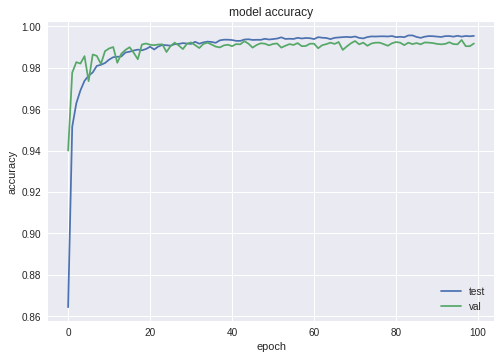

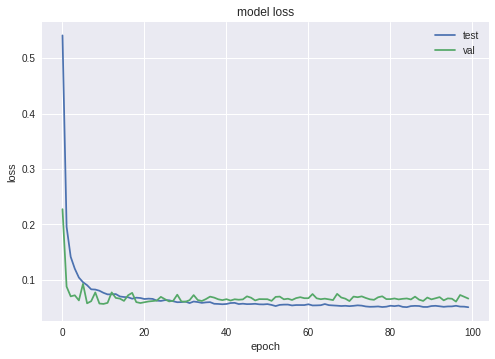

In [ ]:
# Tüm veriyi history değişkeninde tut
print(history.history.keys())
# başarımları ekrana çizdir
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'val'], loc='lower right')
plt.show()
# yitimleri ekrana çizdir
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'val'], loc='upper right')
plt.show()


In [ ]:
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=0, mode='auto')

callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=callbacks, # ERKEN DURDURMA
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[1])
print('Test accuracy:', score[1])
print('val_loss:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 12s 194us/step - loss: 0.0533 - acc: 0.9953 - val_loss: 0.0676 - val_acc: 0.9919
Epoch 2/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.0522 - acc: 0.9953 - val_loss: 0.0676 - val_acc: 0.9914
Epoch 3/100
60000/60000 [==============================] - 11s 192us/step - loss: 0.0501 - acc: 0.9959 - val_loss: 0.0655 - val_acc: 0.9912
Epoch 4/100
60000/60000 [==============================] - 11s 192us/step - loss: 0.0498 - acc: 0.9957 - val_loss: 0.0642 - val_acc: 0.9928
Epoch 5/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.0521 - acc: 0.9951 - val_loss: 0.0629 - val_acc: 0.9917
Epoch 6/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.0502 - acc: 0.9956 - val_loss: 0.0691 - val_acc: 0.9915
Epoch 7/100
60000/60000 [==============================] - 11s 191us/step - loss: 0.0510 - acc: 0.9951 - val_l

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


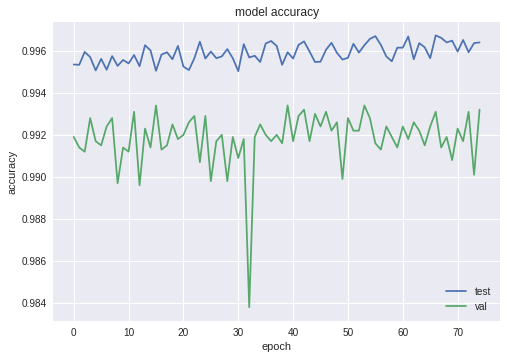

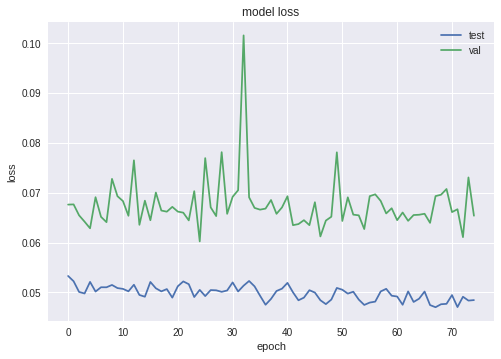

In [ ]:
# Tüm veriyi history değişkeninde tut
print(history2.history.keys())
# başarımları ekrnaa çiz
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'val'], loc='lower right')
plt.show()
# yitimleri ekrana çizdir
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'val'], loc='upper right')
plt.show()

